In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
import math
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path = '/home/sdi1500052/Downloads/crime.csv'

In [3]:
df = pd.read_csv(path,engine='python')

In [4]:
df[0:10]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [5]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [6]:
df2 = df

In [7]:
df2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [8]:
df2 =df2.drop('OFFENSE_CODE',axis=1)

In [9]:
df2 = df2.drop('OFFENSE_CODE_GROUP',axis=1)
df2 = df2.drop('OFFENSE_DESCRIPTION',axis=1)
df2 = df2.drop('DISTRICT',axis=1)
df2 = df2.drop('REPORTING_AREA',axis=1)
df2 =df2.drop('SHOOTING',axis=1)
df2 =df2.drop('OCCURRED_ON_DATE',axis=1)
df2 =df2.drop('HOUR',axis=1)
df2 =df2.drop('UCR_PART',axis=1)
df2 =df2.drop('STREET',axis=1)
df2 =df2.drop('Lat',axis=1)
df2 =df2.drop('Long',axis=1)
df2 =df2.drop('Location',axis=1)

In [10]:
df2.head()

,INCIDENT_NUMBER,YEAR,MONTH,DAY_OF_WEEK
0,I182080058,2018,10,Wednesday
1,I182080053,2018,8,Thursday
2,I182080052,2018,10,Wednesday
3,I182080051,2018,10,Wednesday
4,I182080050,2018,10,Wednesday


In [11]:
df3 = df2

In [12]:
df3 = df3.drop('MONTH',axis=1)
df3 = df3.drop('DAY_OF_WEEK',axis=1)
df3 = df3.drop('INCIDENT_NUMBER',axis=1)

In [13]:
l = [1]*327820

In [14]:
df3['Crimes']= l 

In [15]:
df6 = df3.groupby('YEAR').sum()
df6

,Crimes
YEAR,
2015,53392
2016,99134
2017,100938
2018,74356


In [16]:
df4 = df2
df4 = df4.drop('INCIDENT_NUMBER',axis=1)
df4 = df4.drop('YEAR',axis=1)
df4 = df4.drop('DAY_OF_WEEK',axis=1)
df4['Crimes']= l
df7 = df4.groupby('MONTH').sum()

In [17]:
df5 = df2
df5 = df5.drop('INCIDENT_NUMBER',axis=1)
df5= df5.drop('YEAR',axis=1)
df5= df5.drop('MONTH',axis=1)
df5['Crimes']= l
df8 = df5.groupby('DAY_OF_WEEK').sum()

GRAFHMA GIA EGKLHMATA ANA XRONO

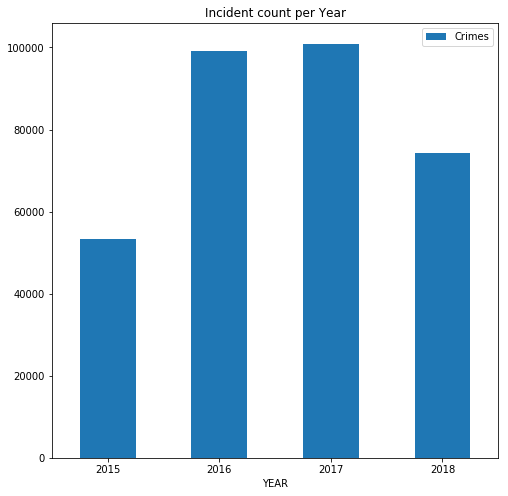

In [18]:
#ax = sns.barplot(x='YEAR',y="Crimes",data=df6)
df6.plot.bar(align="center", figsize=(8,8), title="Incident count per Year", rot=360)

GRAFHMA GIA EGKLHMATA ANA MHNA

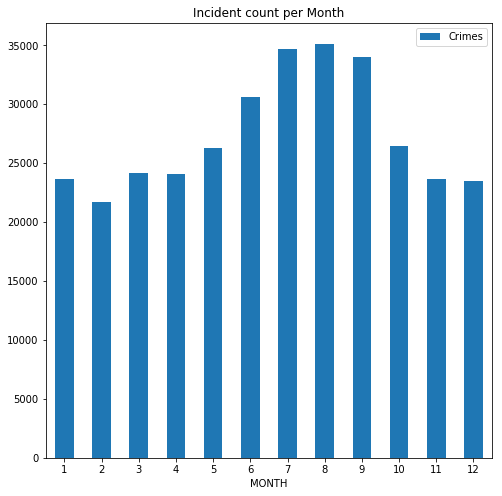

In [19]:
df7.plot.bar(align="center", figsize=(8,8), title="Incident count per Month", rot=360)

GRAFHMA GIA EGKLHMATA ANA MERA

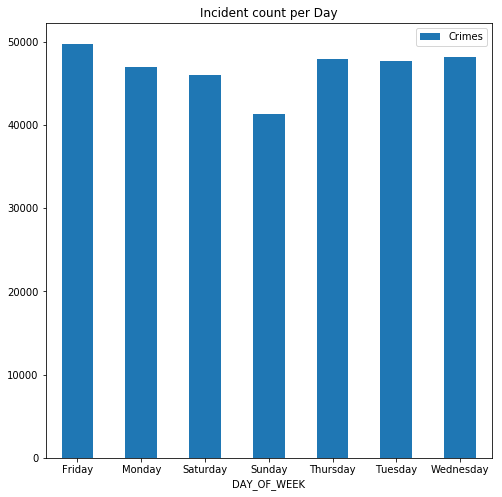

In [20]:
df8.plot.bar(align="center", figsize=(8,8), title="Incident count per Day", rot=360)

In [21]:
df9 = df.groupby('DISTRICT')['INCIDENT_NUMBER'].count()

In [22]:
df['DISTRICT'].nunique()


12

GRAFHMA ANA PERIOXH(STO FIGSIZE EBALA 8,12 ANTI GIA 8,8 GIATI APO PANW UPOLOGISA OTI OI TOPO8ESIES EINAI 12).

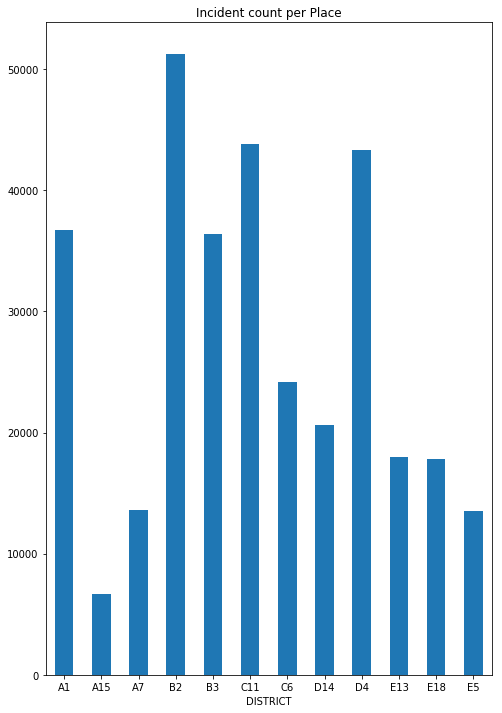

In [23]:
df9.plot.bar(align="center", figsize=(8,12), title="Incident count per Place", rot=360)

In [24]:
## ERWTHMA 2

In [25]:
a = df['SHOOTING'].unique()
print (a)
#b = np.where(np.isnan(a),"No",a)

[nan 'Y']


ME thn apokatw entolh kanoume to nan na einai 'N'

In [26]:
df['SHOOTING'] = df['SHOOTING'].replace(np.nan,'N',regex=True)

In [27]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [28]:
df10 = df[['SHOOTING','YEAR']].copy()

In [29]:
df10.head()

,SHOOTING,YEAR
0,N,2018
1,N,2018
2,N,2018
3,N,2018
4,N,2018


In [30]:
dflist = df10.values.tolist()

In [31]:
print (dflist[0:5])
print (type(dflist))

[['N', 2018], ['N', 2018], ['N', 2018], ['N', 2018], ['N', 2018]]
<class 'list'>


In [32]:
for i in dflist:
    if i[0] == 'N':
        del(i[:])
        
        

In [33]:
print (dflist[0:10])

[[], [], [], [], [], [], [], [], [], []]


In [34]:
dflist2 = [x for x in dflist if x!= []]

Me tis apopanw entoles,ka8arizw thn lista mou etsi wste na exw mono ta shooting pou ginane.

In [35]:
print (dflist2[0:5])

[['Y', 2018], ['Y', 2018], ['Y', 2018], ['Y', 2018], ['Y', 2018]]


In [36]:
df11 =DataFrame(dflist2)

In [37]:
df11.columns = ['SHOOTING','YEAR']
df11.head()

,SHOOTING,YEAR
0,Y,2018
1,Y,2018
2,Y,2018
3,Y,2018
4,Y,2018


In [38]:
df12 = df11.groupby('YEAR')['SHOOTING'].count()

In [39]:
df12

YEAR
2015    185
2016    279
2017    371
2018    220
Name: SHOOTING, dtype: int64

GRAFHMA GIA PUROBOLISMOUS ANA XRONO

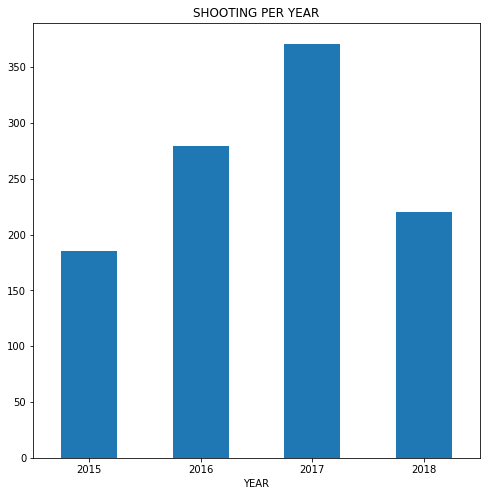

In [40]:
df12.plot.bar(align="center", figsize=(8,8), title="SHOOTING PER YEAR", rot=360)

In [41]:
df13 = df[['SHOOTING','DISTRICT']].copy()

In [42]:
df13.head()

,SHOOTING,DISTRICT
0,N,E18
1,N,D14
2,N,B2
3,N,A1
4,N,A7


In [43]:
df13 = df[['SHOOTING','DISTRICT']].copy()

In [44]:
newdflist = df13.values.tolist()

In [45]:
for i in newdflist:
    if i[0] == 'N':
        del(i[:])

In [46]:
newdflist2 = [x for x in newdflist if x!= []]

In [47]:
print (newdflist2[0:10])

[['Y', 'C11'], ['Y', 'C11'], ['Y', 'B2'], ['Y', 'B3'], ['Y', 'B3'], ['Y', 'E13'], ['Y', 'B2'], ['Y', 'B2'], ['Y', 'B2'], ['Y', 'B2']]


ka8arizoume kai pali ta shootings gia na einai mono Y 

In [48]:
df14 =DataFrame(newdflist2)

In [49]:
df14.columns = ['SHOOTING','DISTRICT']
df14.head()

,SHOOTING,DISTRICT
0,Y,C11
1,Y,C11
2,Y,B2
3,Y,B3
4,Y,B3


In [50]:
df15 = df14.groupby('DISTRICT')['SHOOTING'].count()

In [51]:
df15

DISTRICT
A1      12
A15      5
A7      17
B2     352
B3     227
C11    195
C6      41
D14     21
D4      59
E13     70
E18     35
E5      19
Name: SHOOTING, dtype: int64

GRAFHMA GIA PUROBOLISMOUS ENA PERIOXH(PALI EBALA STO FIGSIZE 8,12)

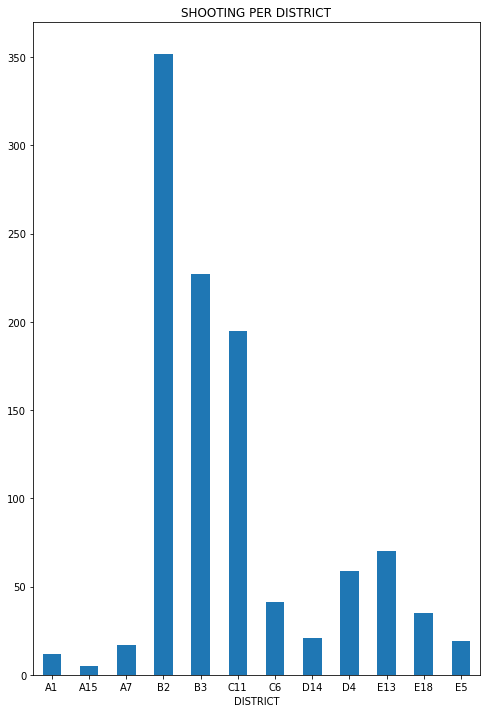

In [52]:
df15.plot.bar(align="center", figsize=(8,12), title="SHOOTING PER DISTRICT", rot=360)

In [53]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [54]:
df16 = df[['HOUR']].copy()
df16['DAY OR NIGHT']=l
df16.head()

,HOUR,DAY OR NIGHT
0,20,1
1,20,1
2,19,1
3,20,1
4,20,1


In [55]:
newdflist3 = df16.values.tolist()

ERWTHMA 3:ME tis apo katw entoles 8a tropopoihsw to neo column day or night pou eftia3a

In [56]:
for i in newdflist3:
    if i[0] >= 18 or i[0] <= 6:
        i[1]='Night'
    else:
        i[1]='Day'

In [57]:
print (newdflist3[0:15])

[[20, 'Night'], [20, 'Night'], [19, 'Night'], [20, 'Night'], [20, 'Night'], [20, 'Night'], [20, 'Night'], [19, 'Night'], [19, 'Night'], [20, 'Night'], [19, 'Night'], [20, 'Night'], [17, 'Day'], [8, 'Day'], [19, 'Night']]


In [58]:
df17 =DataFrame(newdflist3)

In [59]:
df17.columns = ['HOUR','DAY OR NIGHT']
df17.head()

,HOUR,DAY OR NIGHT
0,20,Night
1,20,Night
2,19,Night
3,20,Night
4,20,Night


In [60]:
df17['HOUR']=df['INCIDENT_NUMBER']
df17.head()

,HOUR,DAY OR NIGHT
0,I182080058,Night
1,I182080053,Night
2,I182080052,Night
3,I182080051,Night
4,I182080050,Night


In [61]:
df17.columns = ['INCIDENT_NUMBER','DAY OR NIGHT']

In [62]:
df17.head()

,INCIDENT_NUMBER,DAY OR NIGHT
0,I182080058,Night
1,I182080053,Night
2,I182080052,Night
3,I182080051,Night
4,I182080050,Night


In [63]:
df18 = df17.groupby('DAY OR NIGHT')['INCIDENT_NUMBER'].count()

In [64]:
df18

DAY OR NIGHT
Day      184268
Night    143552
Name: INCIDENT_NUMBER, dtype: int64

PARATHROUME OTI TA EGKLHMATA THN HMERA EINAI PERISSOTERA

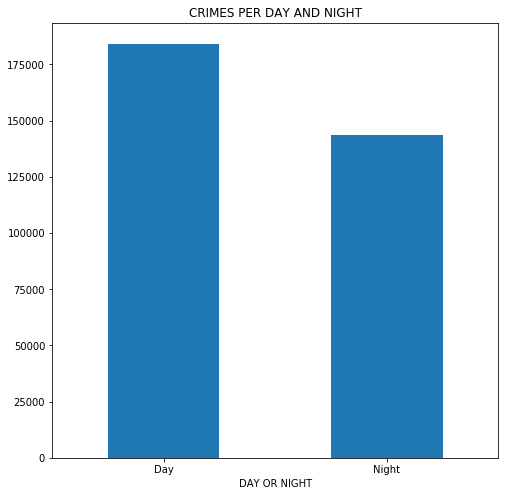

In [65]:
df18.plot.bar(align="center", figsize=(8,8), title="CRIMES PER DAY AND NIGHT", rot=360)

In [66]:
df17.head()

,INCIDENT_NUMBER,DAY OR NIGHT
0,I182080058,Night
1,I182080053,Night
2,I182080052,Night
3,I182080051,Night
4,I182080050,Night


In [67]:
df19 = df17

In [68]:
df19['INCIDENT_NUMBER']=df['OFFENSE_CODE_GROUP']

In [69]:
df19.columns= ['OFFENSE_CODE_GROUP','DAY OR NIGHT']
df19[0:15]

,OFFENSE_CODE_GROUP,DAY OR NIGHT
0,Disorderly Conduct,Night
1,Property Lost,Night
2,Other,Night
3,Aggravated Assault,Night
4,Aircraft,Night
5,Vandalism,Night
6,Motor Vehicle Accident Response,Night
7,Verbal Disputes,Night
8,Simple Assault,Night
9,Towed,Night


In [70]:
newdflist4 = df19.values.tolist()

In [71]:
print (newdflist4[0:10])

[['Disorderly Conduct', 'Night'], ['Property Lost', 'Night'], ['Other', 'Night'], ['Aggravated Assault', 'Night'], ['Aircraft', 'Night'], ['Vandalism', 'Night'], ['Motor Vehicle Accident Response', 'Night'], ['Verbal Disputes', 'Night'], ['Simple Assault', 'Night'], ['Towed', 'Night']]


ka8arizoume thn sthlh gia na meinei mono day

In [72]:
for i in newdflist4:
    if i[1] == 'Night':
        del(i[:])

In [73]:
print (newdflist4[0:15])

[[], [], [], [], [], [], [], [], [], [], [], [], ['Medical Assistance', 'Day'], ['Investigate Person', 'Day'], []]


In [74]:
newdflist5 = [x for x in newdflist4 if x!= []]

In [75]:
print (newdflist5[0:10])

[['Medical Assistance', 'Day'], ['Investigate Person', 'Day'], ['Drug Violation', 'Day'], ['Vandalism', 'Day'], ['Investigate Property', 'Day'], ['Liquor Violation', 'Day'], ['Auto Theft', 'Day'], ['Larceny', 'Day'], ['Verbal Disputes', 'Day'], ['Investigate Person', 'Day']]


In [76]:
df20=DataFrame(newdflist5)

In [77]:
df20.columns = ['OFFENSE_CODE_GROUP','CrimeDay']
df20.head()

,OFFENSE_CODE_GROUP,CrimeDay
0,Medical Assistance,Day
1,Investigate Person,Day
2,Drug Violation,Day
3,Vandalism,Day
4,Investigate Property,Day


In [78]:
l5 =[1]*184268

In [79]:
df20['CrimeDay']=l5

In [80]:
df['OFFENSE_CODE_GROUP'].nunique()


67

In [81]:
df21 = df20.groupby('OFFENSE_CODE_GROUP')['CrimeDay'].count()

PARATHROUME OTI TO PIO SUNH8ISMENO EGKLHMA TO PRWI EINAI TO MOTOR VEHICLE ACCIDENT REPORT

In [82]:
df21

OFFENSE_CODE_GROUP
Aggravated Assault                   3568
Aircraft                               23
Arson                                  42
Assembly or Gathering Violations      308
Auto Theft                           2325
Auto Theft Recovery                   670
Ballistics                            422
Biological Threat                       2
Bomb Hoax                              58
Burglary - No Property Taken            2
Commercial Burglary                   508
Confidence Games                     2028
Counterfeiting                       1067
Criminal Harassment                    80
Disorderly Conduct                   1127
Drug Violation                      10065
Embezzlement                          218
Evading Fare                          155
Explosives                             18
Fire Related Reports                  971
Firearm Discovery                     499
Firearm Violations                    861
Fraud                                4347
Gambling       

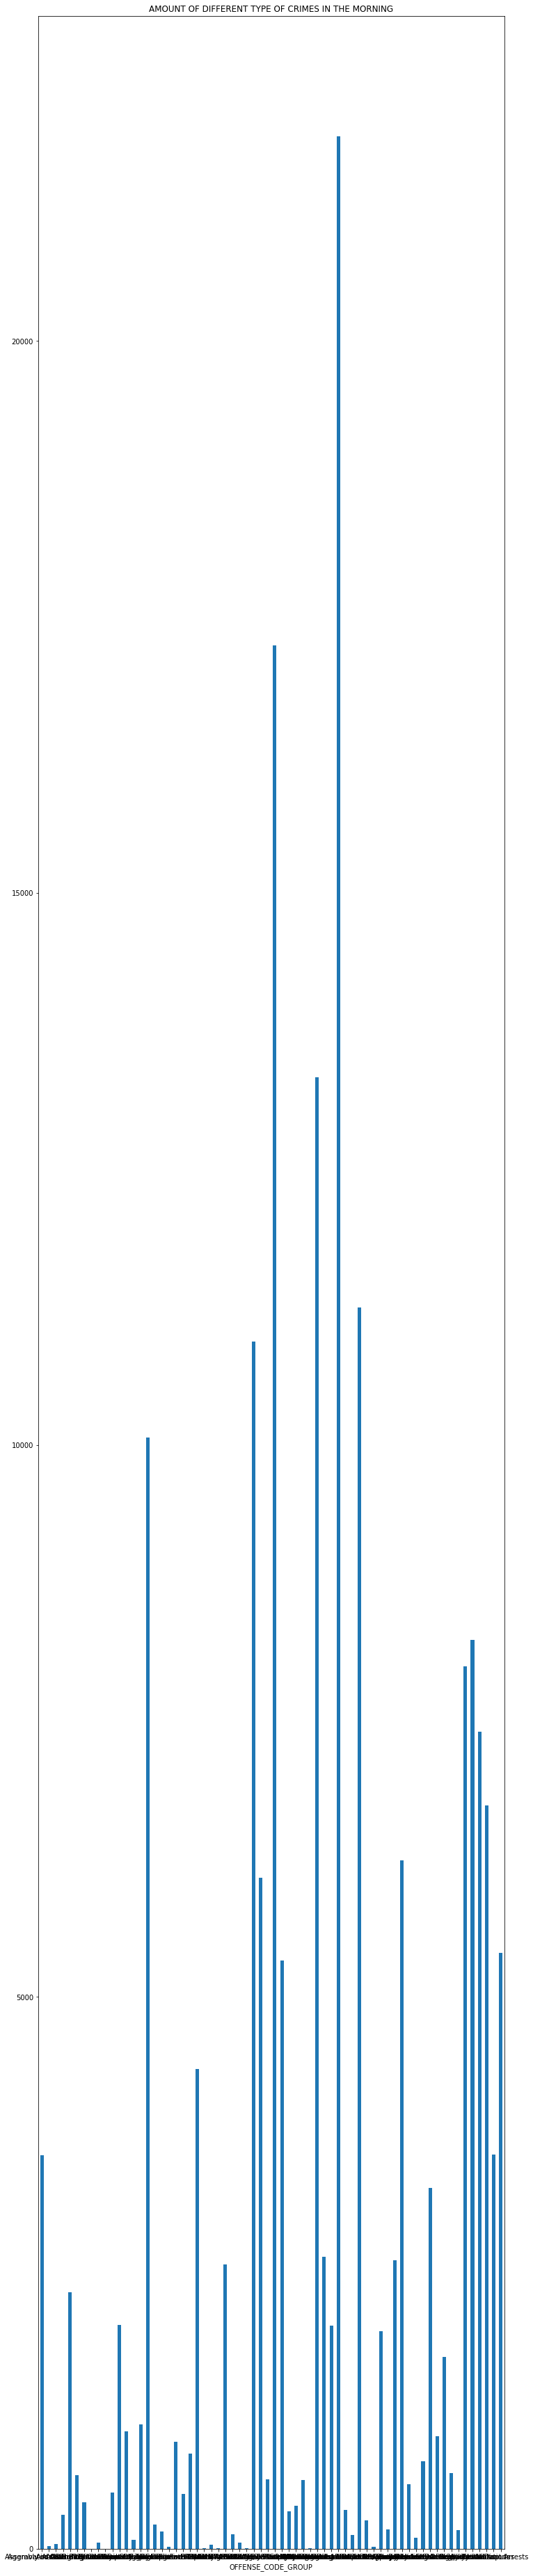

In [83]:
df21.plot.bar(align="center", figsize=(12,67), title="AMOUNT OF DIFFERENT TYPE OF CRIMES IN THE MORNING", rot=360)

In [84]:
##ERWTHMA 5

In [85]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [86]:
df23 = df[['Lat','Long']].copy()

In [87]:
df23.head()

,Lat,Long
0,42.262608,-71.121186
1,42.352111,-71.135311
2,42.308126,-71.076930
3,42.359454,-71.059648
4,42.375258,-71.024663


In [88]:
df23list=df23.values.tolist()

In [89]:
print (df23list[0:5])

[[42.26260773, -71.12118637], [42.35211146, -71.13531147], [42.30812619, -71.07692974], [42.35945371, -71.05964817], [42.37525782, -71.02466343]]


In [90]:
for i in df23list:
    if i[0] == -1.0 or i[1] == -1.0:
        del(i[:])
df23list = [ [ n for n in row if not np.isnan(n)] for row in df23list ]
newdf23list = [x for x in df23list if x!= []]

PARATHRHSAME OTI TA COLUMN LAT KAI LONG EIXAN KAPOIES TIMES NAN KAI KAPOIES -1.0,TIS OPOIES AFAIRESAME GIA NA FAINONTAI KALUTERA TA APOTELESMATA MAS.

In [91]:
print (newdf23list[0:500])

[[42.26260773, -71.12118637], [42.35211146, -71.13531147], [42.30812619, -71.07692974], [42.35945371, -71.05964817], [42.37525782, -71.02466343], [42.29919694, -71.06046974], [42.32073413, -71.05676415], [42.33380683, -71.10377843], [42.25614494, -71.12802506], [42.348866, -71.08936284], [42.34432328, -71.15778368], [42.32324363, -71.10892316], [42.26059891, -71.1030614], [42.27986526, -71.08798275], [42.27791927, -71.0964061], [42.31596119, -71.09042564], [42.28076737, -71.04736497], [42.31277782, -71.07562922], [42.34268073, -71.09937714], [42.30998781, -71.06213111], [42.33001489, -71.03851306], [42.3479724, -71.07849582], [42.32527567, -71.08351579], [42.32579408, -71.08563758], [42.32579408, -71.08563758], [42.31779354, -71.04210959], [42.34952402, -71.07949284], [42.31694189, -71.10394558], [42.34285014, -71.06516235], [42.35321122, -71.14841124], [42.36570319, -71.05580301], [42.38305542, -71.02117632], [42.31915678, -71.10067583], [42.31041438, -71.05918086], [42.31041438, -71.

In [92]:
print (len(newdf23list))

306413


In [93]:
df24=DataFrame(newdf23list)

In [94]:
df24.columns=['Latt','Longt']

Ftiaxnw to location opws stis diafaneies gia na testarw me seaborn kai me matplotlib

In [95]:
location= df24[['Latt','Longt']]
location = location.dropna()
location = location.loc[(location['Latt']>40) & (location['Longt'] < -60)]
location.head()

,Latt,Longt
0,42.262608,-71.121186
1,42.352111,-71.135311
2,42.308126,-71.076930
3,42.359454,-71.059648
4,42.375258,-71.024663


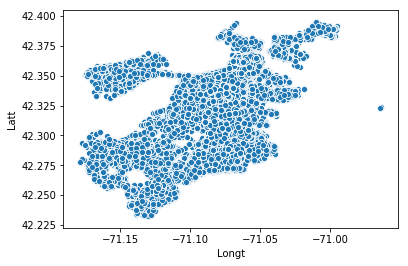

In [96]:
ax = sns.scatterplot(x='Longt',y='Latt',data=location)

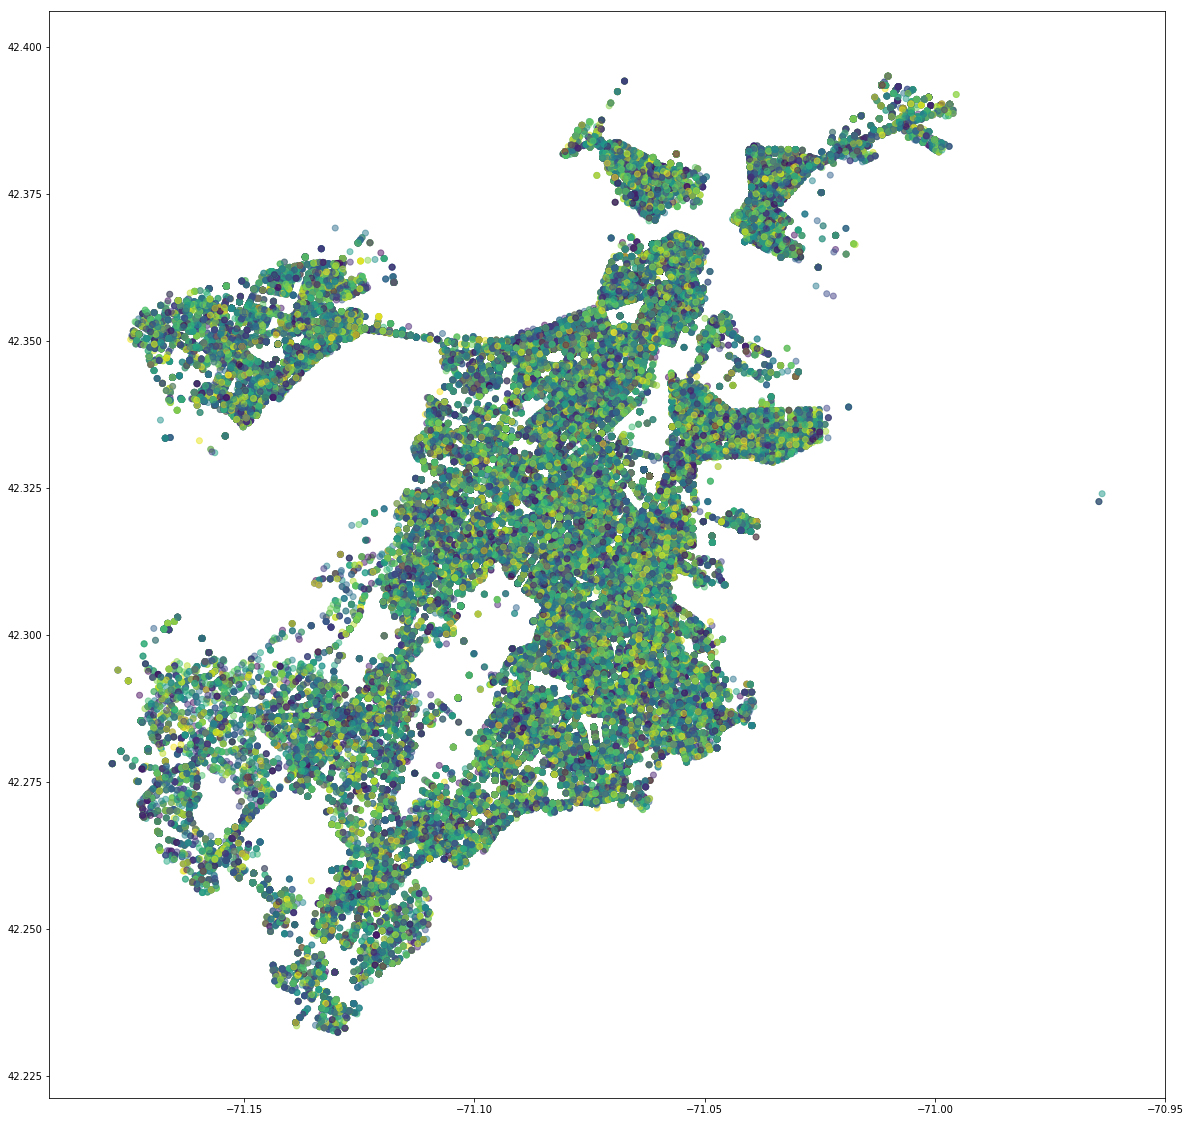

In [97]:
x = location['Longt']
y = location['Latt']
colors = np.random.rand(len(location))
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

In [98]:
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [99]:
iris = datasets.load_iris()
X = iris.data


In [100]:
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_

Text(0.5, 0.92, 'K Means')

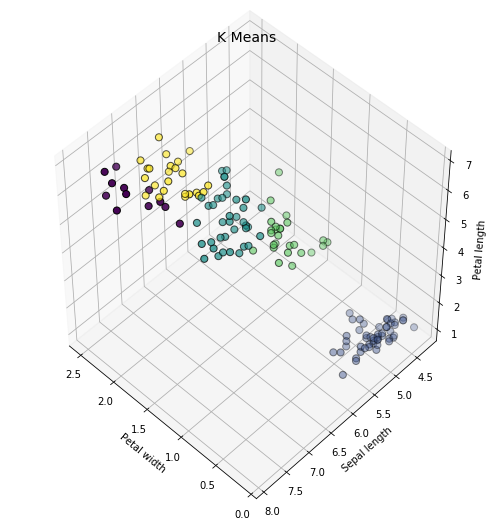

In [101]:
fig = plt.figure(1, figsize=(7,7))
ax =Axes3D(fig, rect=[0, 0, 0.95, 1],elev=48,azim=134)
ax.scatter(X[:,3],X[:,0],X[:,2],c=labels.astype(np.float),edgecolor="k",s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means",fontsize=14)

In [102]:
kmeans= KMeans(n_clusters=3).fit(location)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 42.30214573 -71.07749679]
 [ 42.35052384 -71.06403454]
 [ 42.30715915 -71.13002835]]


Prwto kmeans me lat kai long mono gia 3 clusters

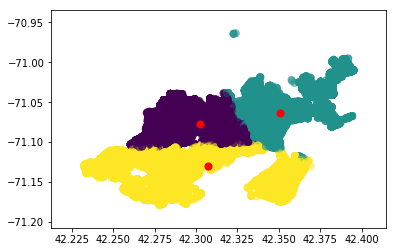

In [103]:
plt.scatter(location['Latt'], location['Longt'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Lat kai long me 5 clusters

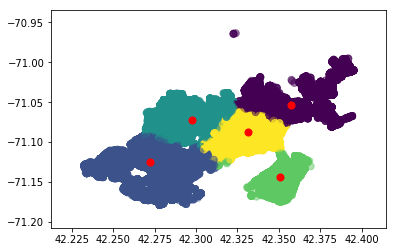

In [104]:
kmeans= KMeans(n_clusters=5).fit(location)
centroids = kmeans.cluster_centers_
plt.scatter(location['Latt'], location['Longt'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Lat kai Long me 10 clusters

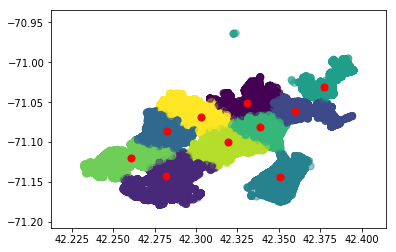

In [105]:
kmeans= KMeans(n_clusters=10).fit(location)
centroids = kmeans.cluster_centers_
plt.scatter(location['Latt'], location['Longt'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Ftiaxnoume neo dataframe gia 3 sthles twra

In [106]:
df30 = df[['Lat','Long','OFFENSE_CODE']].copy()

In [107]:
df30list=df30.values.tolist()

In [108]:
for i in df30list:
    if i[0] == -1.0 or i[1] == -1.0:
        del(i[:])
df30list = [ [ n for n in row if not np.isnan(n)] for row in df30list ]
newdf30list = [x for x in df30list if x!= []]

In [109]:
print (newdf30list[0:300])

[[42.26260773, -71.12118637, 2403.0], [42.35211146, -71.13531147, 3201.0], [42.30812619, -71.07692974, 2647.0], [42.35945371, -71.05964817, 413.0], [42.37525782, -71.02466343, 3122.0], [42.29919694, -71.06046974, 1402.0], [42.32073413, -71.05676415, 3803.0], [42.33380683, -71.10377843, 3301.0], [42.25614494, -71.12802506, 802.0], [42.348866, -71.08936284, 3410.0], [42.34432328, -71.15778368, 3803.0], [42.32324363, -71.10892316, 706.0], [42.26059891, -71.1030614, 3006.0], [42.27986526, -71.08798275, 3115.0], [42.27791927, -71.0964061, 3006.0], [42.31596119, -71.09042564, 3831.0], [42.28076737, -71.04736497, 2647.0], [42.31277782, -71.07562922, 2647.0], [42.34268073, -71.09937714, 3115.0], [42.30998781, -71.06213111, 3108.0], [42.33001489, -71.03851306, 3831.0], [42.3479724, -71.07849582, 613.0], [42.32527567, -71.08351579, 3114.0], [42.32579408, -71.08563758, 3301.0], [42.32579408, -71.08563758, 619.0], [42.31779354, -71.04210959, 2629.0], [42.34952402, -71.07949284, 311.0], [42.3169418

In [110]:
df31=DataFrame(newdf30list)

In [111]:
df31.columns = ['Lattt','Longtt','OFFENSE_CODET']
df31.head()

,Lattt,Longtt,OFFENSE_CODET
0,42.262608,-71.121186,2403.0
1,42.352111,-71.135311,3201.0
2,42.308126,-71.076930,2647.0
3,42.359454,-71.059648,413.0
4,42.375258,-71.024663,3122.0


In [112]:
location2= df31[['Lattt','Longtt','OFFENSE_CODET']]
location2 = location2.dropna()
location2 = location2.loc[(location2['Lattt']>40) & (location2['Longtt'] < -60) & (location2['OFFENSE_CODET'] >2000)]
location2.head()

,Lattt,Longtt,OFFENSE_CODET
0,42.262608,-71.121186,2403.0
1,42.352111,-71.135311,3201.0
2,42.308126,-71.076930,2647.0
4,42.375258,-71.024663,3122.0
6,42.320734,-71.056764,3803.0


In [113]:
kmeans= KMeans(n_clusters=3)
#centroids = kmeans.cluster_centers_
#Axes3D.scatter(location2['Lattt'], location2['Longtt'],location2['OFFENSE_CODET'], c= kmeans.labels_.astype(float),s=50,alpha=0.5)
#Axes3D.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2],c='red', s=50)
km.fit(location2)
km.predict(location2)
labels = km.labels_

In [ ]:
location2.head()

,Lattt,Longtt,OFFENSE_CODET
0,42.262608,-71.121186,2403.0
1,42.352111,-71.135311,3201.0
2,42.308126,-71.076930,2647.0
4,42.375258,-71.024663,3122.0
6,42.320734,-71.056764,3803.0


Thn apo katw entolh thn ebala gia na lusw to error pou mou ebgale.MEtatrepw ta dedomena mou se ena numpy array etsi wste na ta balw sto ax.scatter

In [ ]:
numpy_matrix = location2.as_matrix()


/home/sdi1500052/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0.92, 'K Means')

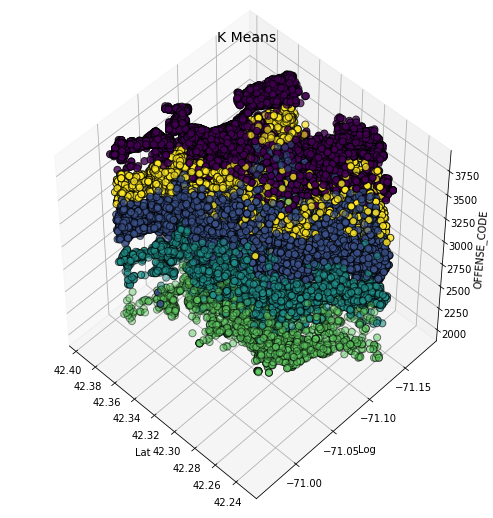

In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0,0,0.95,1],elev=48,azim=134)
ax.scatter(numpy_matrix[:,0],numpy_matrix[:,1],numpy_matrix[:,2],c=labels.astype(np.float),edgecolor="k",s=50)
ax.set_xlabel("Lat")
ax.set_ylabel("Log")
ax.set_zlabel("OFFENSE_CODE")
plt.title("K Means",fontsize=14)

In [ ]:
df40 = df[['Lat','Long','MONTH']].copy()

In [ ]:
df40list=df40.values.tolist()

In [ ]:
for i in df40list:
    if i[0] == -1.0 or i[1] == -1.0:
        del(i[:])
df40list = [ [ n for n in row if not np.isnan(n)] for row in df40list ]
newdf40list = [x for x in df40list if x!= []]

In [ ]:
print (newdf40list[0:100])

[[42.26260773, -71.12118637, 10.0], [42.35211146, -71.13531147, 8.0], [42.30812619, -71.07692974, 10.0], [42.35945371, -71.05964817, 10.0], [42.37525782, -71.02466343, 10.0], [42.29919694, -71.06046974, 10.0], [42.32073413, -71.05676415, 10.0], [42.33380683, -71.10377843, 10.0], [42.25614494, -71.12802506, 10.0], [42.348866, -71.08936284, 10.0], [42.34432328, -71.15778368, 10.0], [42.32324363, -71.10892316, 10.0], [42.26059891, -71.1030614, 10.0], [42.27986526, -71.08798275, 10.0], [42.27791927, -71.0964061, 10.0], [42.31596119, -71.09042564, 10.0], [42.28076737, -71.04736497, 10.0], [42.31277782, -71.07562922, 10.0], [42.34268073, -71.09937714, 10.0], [42.30998781, -71.06213111, 10.0], [42.33001489, -71.03851306, 10.0], [42.3479724, -71.07849582, 10.0], [42.32527567, -71.08351579, 10.0], [42.32579408, -71.08563758, 10.0], [42.32579408, -71.08563758, 10.0], [42.31779354, -71.04210959, 8.0], [42.34952402, -71.07949284, 10.0], [42.31694189, -71.10394558, 10.0], [42.34285014, -71.06516235

In [ ]:
df41=DataFrame(newdf40list)

In [ ]:
df41.columns = ['Latttt','Longttt','MONTHT']
df41.head()

,Latttt,Longttt,MONTHT
0,42.262608,-71.121186,10.0
1,42.352111,-71.135311,8.0
2,42.308126,-71.076930,10.0
3,42.359454,-71.059648,10.0
4,42.375258,-71.024663,10.0


In [ ]:
location3= df41[['Latttt','Longttt','MONTHT']]
location3 = location3.dropna()
location3 = location3.loc[(location3['Latttt']>40) & (location3['Longttt'] < -60) & (location3['MONTHT'] <13)]
location3.head()

,Latttt,Longttt,MONTHT
0,42.262608,-71.121186,10.0
1,42.352111,-71.135311,8.0
2,42.308126,-71.076930,10.0
3,42.359454,-71.059648,10.0
4,42.375258,-71.024663,10.0


In [ ]:
kmeans= KMeans(n_clusters=5)
km.fit(location3)
km.predict(location3)
labels = km.labels_

In [ ]:
numpy_matrix2 = location3.as_matrix()

/home/sdi1500052/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0,0,0.95,1],elev=48,azim=134)
ax.scatter(numpy_matrix2[:,0],numpy_matrix2[:,1],numpy_matrix2[:,2],c=labels.astype(np.float),edgecolor="k",s=50)
ax.set_xlabel("Lat")
ax.set_ylabel("Log")
ax.set_zlabel("MONTH")
plt.title("K Means",fontsize=14)

Text(0.5, 0.92, 'K Means')

In [ ]:
location.head()

In [ ]:
!pip install folium

In [ ]:
import folium

BONUS ERWTHMA

In [ ]:
m = folium.Map(location=[42.262608,-71.121186],zoom_start = 12)
m

In [ ]:
df50 = df[['Lat','Long','OFFENSE_CODE_GROUP']].copy()

In [ ]:
df50list=df50.values.tolist()

In [ ]:
for i in df50list:
    if i[0] == -1.0 or i[1] == -1.0:
        del(i[:])
#df50list = [ [ n for n in row if not np.isnan(n)] for row in df50list ]
#newdf50list = [x for x in df50list if x!= []]

In [ ]:
newdf50list = [x for x in df50list if x!= []]


In [ ]:
for i in newdf50list:
    if i[2] != 'Drug Violation':
        del(i[:])
newdf51list = [x for x in newdf50list if x!= []]

In [ ]:
newdf51list = [ [ n for n in row if not pd.isnull(n)] for row in newdf51list ]


In [ ]:
newdf51list = [x for x in newdf51list if x!= []]

In [ ]:
#print (newdf51list[0:200])

In [ ]:
df60=DataFrame(newdf51list)

In [ ]:
df60.columns=['LATT','LONGT','OFFENSE_DRUG_VIOLATION']

In [ ]:
location5= df60[['LATT','LONGT','OFFENSE_DRUG_VIOLATION']]
location5 = location5.dropna()
location5 = location5.loc[(location5['LATT']>40) & (location5['LONGT'] < -60)]
location5.head()

In [ ]:
m = folium.Map(location=[42.3169,-71.103946],zoom_start=10)


In [ ]:
#for i in newdf51list:
     #folium.Marker(location=[i[0],i[1]],popup='Drug Violation',icon=folium.Icon(color='red',icon='info-sign')).add_to(m)

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
for i in newdf51list:
    if i[0] == 'Drug Violation':
        del(i[:])
newdf51list = [x for x in newdf50list if x!= []]

In [ ]:
newdf51list = [ [ n for n in row if not pd.isnull(n)] for row in newdf51list ]


In [ ]:
#j = 1
#while j < 30:
    #for i in newdf51list:
        #print (i[0])
    #j += 1

In [ ]:
marker_cluster = MarkerCluster().add_to(m)
for i in newdf51list:
    if i[0] != 'Drug Violation':
        folium.Marker(location=[i[0],i[1]],icon=folium.Icon(color='green')).add_to(marker_cluster)
    

In [ ]:
m